<a href="https://colab.research.google.com/github/Louis5228/DLP-lab/blob/main/Lab1_back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def derivative_sigmoid(x):
  return np.multiply(x, 1.0 - x)

def generate_linear(n = 100):
  pts = np.random.uniform(0, 1, (n, 2))
  inputs = []
  labels = []
  for pt in pts:
    inputs.append([pt[0], pt[1]])
    distance = (pt[0] - pt[1]) / 1.414
    if pt[0] > pt[1]:
      labels.append(0)
    else:
      labels.append(1)
  return np.array(inputs), np.array(labels).reshape(n, 1)

def generate_XOR_easy():
  inputs = []
  labels = []
  for i in range(11):
    inputs.append([0.1*i, 0.1*i])
    labels.append(0)

    if 0.1*i == 0.5:
      continue
    
    inputs.append([0.1*i, 1 - 0.1*i])
    labels.append(1)

  return np.array(inputs), np.array(labels).reshape(21, 1)

def show_result(x, y, pred_y):
  plt.figure(figsize=(12, 5))
  plt.subplot(121)
  plt.title("Ground truth", fontsize=18)
  for i in range(x.shape[0]):
    if y[i] == 0:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')
  
  plt.subplot(122)
  plt.title("Predict result", fontsize=18)
  for i in range(x.shape[0]):
    if pred_y[i] < 0.5:
      plt.plot(x[i][0], x[i][1], 'ro')
    else:
      plt.plot(x[i][0], x[i][1], 'bo')
  
  plt.show()

def plot_learning_curve(epochs, loss):
  plt.title('Learning curve', fontsize = 20)
  plt.xlabel('epochs', fontsize = 15)
  plt.ylabel('Loss', fontsize = 15)
  plt.plot(np.arange(1, epochs+1), loss, color='red')
  plt.grid(True)
  plt.show()

def MSE(y_pred, t):
  return np.mean((y_pred - t)**2)

def train(epochs, lr, x, t, w1, w2, w3):
  err_l = []
  for epoch in range(epochs):
    # Forward propagation
    z1 = sigmoid(x.dot(w1)) #n*4
    z2 = sigmoid(z1.dot(w2)) #n*4
    y_pred = sigmoid(z2.dot(w3)) #n*1
    
    err = MSE(y_pred, t)
    err_l.append(err)
    if epoch % 1000 == 0:
      print("epoch {:5d} loss : {:.15f}".format(epoch, err))

    # Back propagation
    err_grad = t - y_pred #n*1
    d_predict_output = err_grad * derivative_sigmoid(y_pred) #n*1
    d_hid2_output = d_predict_output.dot(w3.T) * derivative_sigmoid(z2) #n*4
    d_hid1_output = d_hid2_output.dot(w2) * derivative_sigmoid(z1) #n*4

    w3 += lr * z2.T.dot(d_predict_output) #4*1
    w2 += lr * z1.T.dot(d_hid2_output) # 4*4
    w1 += lr * x.T.dot(d_hid1_output) #2*4
  
  # Predict result
  print("\nTesting prediction:\n", y_pred)
  # Accuracy
  acc = np.count_nonzero((y_pred - t) < 0.02) / t.shape[0]
  print("\nAccuracy :", acc)
  show_result(x, t, y_pred)
  plot_learning_curve(epochs, err_l)

def train_withot_act(epochs, lr, x, t, w1, w2, w3):
  err_l = []
  for epoch in range(epochs):
    # Forward propagation
    z1 = x.dot(w1) #n*4
    z2 = z1.dot(w2) #n*4
    y_pred = z2.dot(w3) #n*1
    
    err = MSE(y_pred, t)
    err_l.append(err)
    if epoch % 1000 == 0:
      print("epoch {:5d} loss : {:.15f}".format(epoch, err))

    # Back propagation
    err_grad = t - y_pred #n*1
    d_predict_output = err_grad * y_pred #n*1
    d_hid2_output = d_predict_output.dot(w3.T) * z2 #n*4
    d_hid1_output = d_hid2_output.dot(w2) * z1 #n*4

    w3 += lr * z2.T.dot(d_predict_output) #4*1
    w2 += lr * z1.T.dot(d_hid2_output) # 4*4
    w1 += lr * x.T.dot(d_hid1_output) #2*4
  
  # Predict result
  print("\nTesting prediction:\n", y_pred)
  # Accuracy
  acc = np.count_nonzero((y_pred - t) < 0.02) / t.shape[0]
  print("\nAccuracy :", acc)
  show_result(x, t, y_pred)
  plot_learning_curve(epochs, err_l)

In [38]:
# Define number of neurons for each layer
input_Neurons = 2
hid1_Neurons = 4
hid2_Neurons = 4
output_Neurons = 1

## 1. Linear dataset

epoch     0 loss : 0.342814620320431
epoch  1000 loss : 0.003034170602918
epoch  2000 loss : 0.000923766693634
epoch  3000 loss : 0.000479260950503
epoch  4000 loss : 0.000305733936471
epoch  5000 loss : 0.000217559387688
epoch  6000 loss : 0.000165630381720
epoch  7000 loss : 0.000132001126358
epoch  8000 loss : 0.000108728262443
epoch  9000 loss : 0.000091813129944
epoch 10000 loss : 0.000079046676101
epoch 11000 loss : 0.000069119247152
epoch 12000 loss : 0.000061210071271
epoch 13000 loss : 0.000054781159492
epoch 14000 loss : 0.000049466576137
epoch 15000 loss : 0.000045009555548
epoch 16000 loss : 0.000041225099821
epoch 17000 loss : 0.000037976842642
epoch 18000 loss : 0.000035162247567
epoch 19000 loss : 0.000032702857285
epoch 20000 loss : 0.000030537703335
epoch 21000 loss : 0.000028618749721
epoch 22000 loss : 0.000026907678422
epoch 23000 loss : 0.000025373580172
epoch 24000 loss : 0.000023991268239
epoch 25000 loss : 0.000022740028787
epoch 26000 loss : 0.000021602682217
e

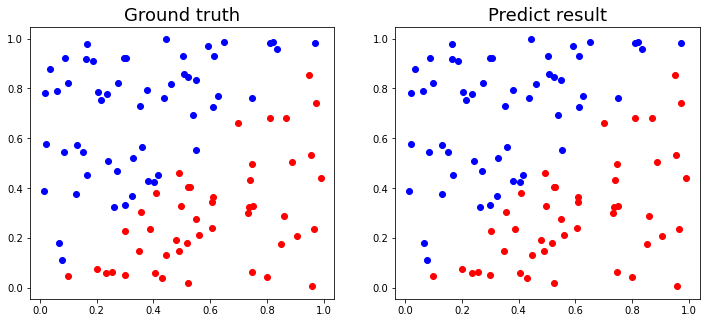

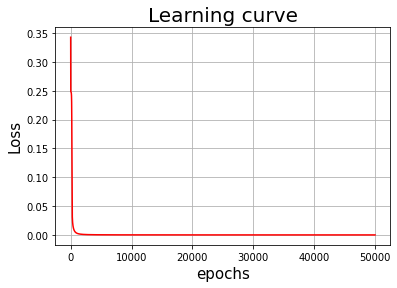

In [39]:
# Random weights initialization
w1 = np.random.uniform(size=(input_Neurons, hid1_Neurons))
w2 = np.random.uniform(size=(hid1_Neurons, hid2_Neurons))
w3 = np.random.uniform(size=(hid2_Neurons, output_Neurons))

# Define epochs and learning rate
epochs = 50000
lr = 0.1

x, t = generate_linear(n=100)
train(epochs, lr, x, t, w1, w2, w3)

## 2. XOR dataset

epoch     0 loss : 0.420095796422224
epoch  1000 loss : 0.249494391126183
epoch  2000 loss : 0.249481570163918
epoch  3000 loss : 0.249467381085927
epoch  4000 loss : 0.249448940084533
epoch  5000 loss : 0.249421214486797
epoch  6000 loss : 0.249374957497000
epoch  7000 loss : 0.249292542298710
epoch  8000 loss : 0.249139972143315
epoch  9000 loss : 0.248852556525845
epoch 10000 loss : 0.248309859017186
epoch 11000 loss : 0.247284014671166
epoch 12000 loss : 0.245216129244354
epoch 13000 loss : 0.238492164982355
epoch 14000 loss : 0.212659298421315
epoch 15000 loss : 0.180965915860768
epoch 16000 loss : 0.081757912051436
epoch 17000 loss : 0.056712570068153
epoch 18000 loss : 0.041566665459305
epoch 19000 loss : 0.030207065258412
epoch 20000 loss : 0.021646953642073
epoch 21000 loss : 0.015680901805623
epoch 22000 loss : 0.011636363109335
epoch 23000 loss : 0.008883431149947
epoch 24000 loss : 0.006974172879231
epoch 25000 loss : 0.005616722872541
epoch 26000 loss : 0.004625919566003
e

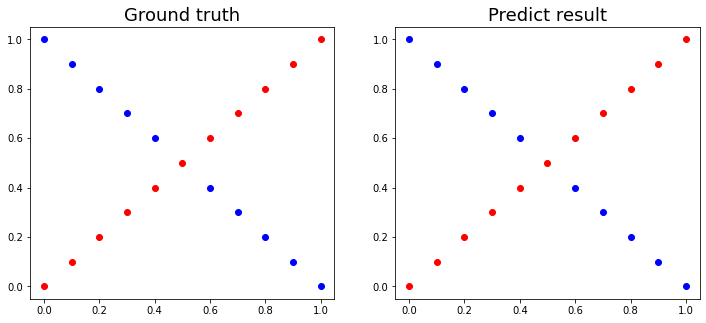

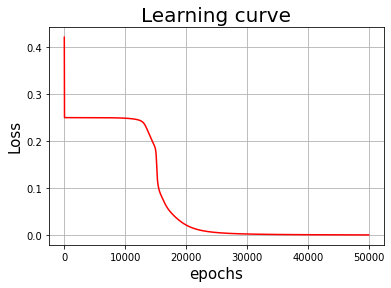

In [40]:
# Random weights initialization
w1 = np.random.uniform(size=(input_Neurons, hid1_Neurons))
w2 = np.random.uniform(size=(hid1_Neurons, hid2_Neurons))
w3 = np.random.uniform(size=(hid2_Neurons, output_Neurons))

# Define epochs and learning rate
epochs = 50000
lr = 0.05

x, t = generate_XOR_easy()
train(epochs, lr, x, t, w1, w2, w3)

### Without activation functions

### 1. Linear dataset

epoch     0 loss : 0.465897909092273
epoch  1000 loss : 0.223315771041682
epoch  2000 loss : 0.193248530302423
epoch  3000 loss : 0.166775087019089
epoch  4000 loss : 0.145332823015733
epoch  5000 loss : 0.129455736399445
epoch  6000 loss : 0.118581059694929
epoch  7000 loss : 0.111530368427587
epoch  8000 loss : 0.107083719961734
epoch  9000 loss : 0.104292278326300
epoch 10000 loss : 0.102522227201262
epoch 11000 loss : 0.101381126245402
epoch 12000 loss : 0.100632994933202
epoch 13000 loss : 0.100136179479109
epoch 14000 loss : 0.099804471629910
epoch 15000 loss : 0.099584244600409
epoch 16000 loss : 0.099441270087146
epoch 17000 loss : 0.099353103925539
epoch 18000 loss : 0.099304630787814
epoch 19000 loss : 0.099285407926029
epoch 20000 loss : 0.099288046935906
epoch 21000 loss : 0.099307205205205
epoch 22000 loss : 0.099338942729300
epoch 23000 loss : 0.099380302524917
epoch 24000 loss : 0.099429030800848
epoch 25000 loss : 0.099483386318973
epoch 26000 loss : 0.099542007843029
e

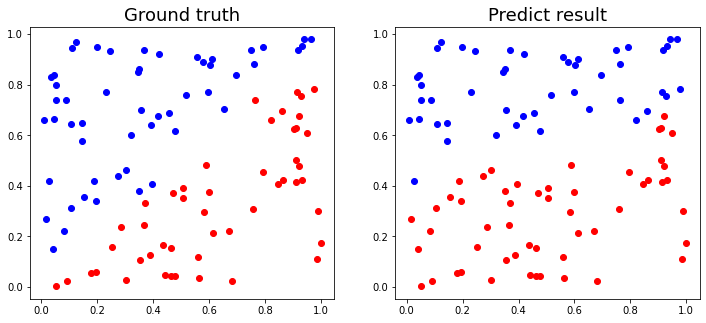

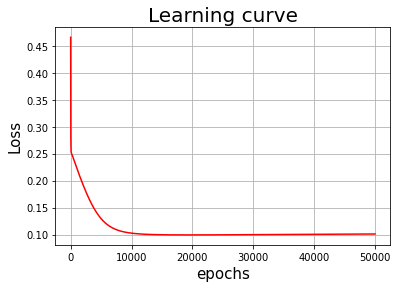

In [43]:
# Random weights initialization
w1 = np.random.uniform(size=(input_Neurons, hid1_Neurons))
w2 = np.random.uniform(size=(hid1_Neurons, hid2_Neurons))
w3 = np.random.uniform(size=(hid2_Neurons, output_Neurons))

# Define epochs and learning rate
epochs = 50000
lr = 0.0001

x, t = generate_linear(n=100)
train_withot_act(epochs, lr, x, t, w1, w2, w3)

### 2. XOR dataset

epoch     0 loss : 11.845726098555126
epoch  1000 loss : 0.303746494361634
epoch  2000 loss : 0.305348256775117
epoch  3000 loss : 0.305282798784271
epoch  4000 loss : 0.305161330175377
epoch  5000 loss : 0.305045317800965
epoch  6000 loss : 0.304938050297890
epoch  7000 loss : 0.304840273665585
epoch  8000 loss : 0.304752506790210
epoch  9000 loss : 0.304675141861567
epoch 10000 loss : 0.304608448426518
epoch 11000 loss : 0.304552579102193
epoch 12000 loss : 0.304507580736060
epoch 13000 loss : 0.304473409528038
epoch 14000 loss : 0.304449948313910
epoch 15000 loss : 0.304437024424353
epoch 16000 loss : 0.304434426898695
epoch 17000 loss : 0.304441922227471
epoch 18000 loss : 0.304459268156184
epoch 19000 loss : 0.304486225371456
epoch 20000 loss : 0.304522567101055
epoch 21000 loss : 0.304568086796728
epoch 22000 loss : 0.304622604146386
epoch 23000 loss : 0.304685969694935
epoch 24000 loss : 0.304758068355056
epoch 25000 loss : 0.304838822072184
epoch 26000 loss : 0.304928191880671


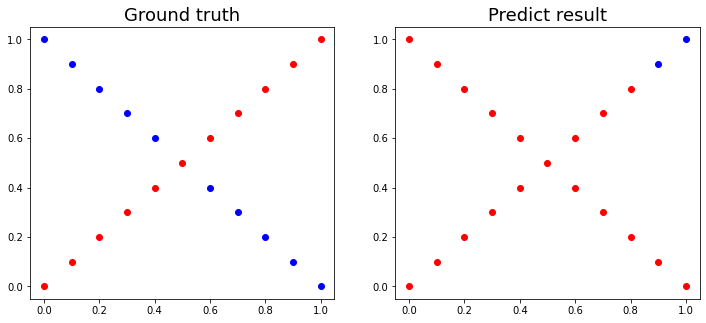

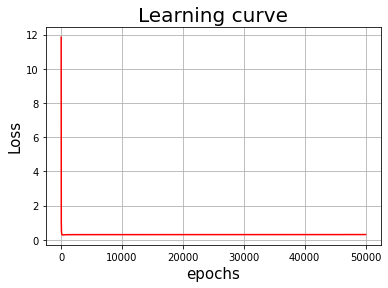

In [42]:
# Random weights initialization
w1 = np.random.uniform(size=(input_Neurons, hid1_Neurons))
w2 = np.random.uniform(size=(hid1_Neurons, hid2_Neurons))
w3 = np.random.uniform(size=(hid2_Neurons, output_Neurons))

# Define epochs and learning rate
epochs = 50000
lr = 0.0001

x, t = generate_XOR_easy()
train_withot_act(epochs, lr, x, t, w1, w2, w3)